Data Point 1: Timestamp: 1719992195, Latitude: -16.692, Longitude: -174.3097
Data Point 2: Timestamp: 1719992206, Latitude: -16.1489, Longitude: -173.8755
Data Point 3: Timestamp: 1719992217, Latitude: -15.6296, Longitude: -173.4636
Data Point 4: Timestamp: 1719992229, Latitude: -15.01, Longitude: -172.9762
Data Point 5: Timestamp: 1719992241, Latitude: -14.4387, Longitude: -172.5305
Data Point 6: Timestamp: 1719992253, Latitude: -13.8416, Longitude: -172.068
Data Point 7: Timestamp: 1719992263, Latitude: -13.3182, Longitude: -171.6656
Data Point 8: Timestamp: 1719992275, Latitude: -12.7441, Longitude: -171.227
Data Point 9: Timestamp: 1719992285, Latitude: -12.219, Longitude: -170.8284
Data Point 10: Timestamp: 1719992296, Latitude: -11.6933, Longitude: -170.4316
Data Point 11: Timestamp: 1719992308, Latitude: -11.0914, Longitude: -169.98
Data Point 12: Timestamp: 1719992318, Latitude: -10.5641, Longitude: -169.5866
Data Point 13: Timestamp: 1719992329, Latitude: -10.0363, Longitude: 

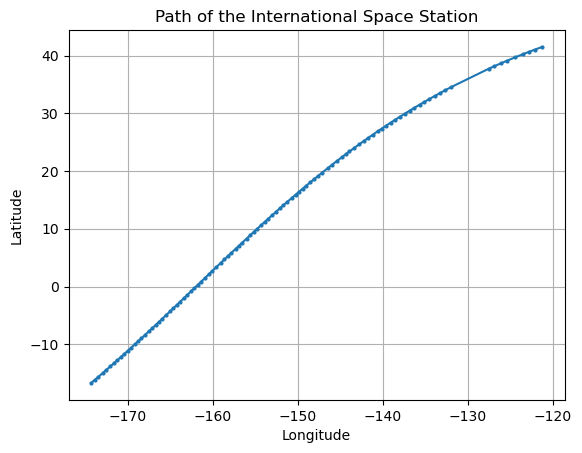

In [19]:
import requests
import time
import matplotlib.pyplot as plt
from requests.exceptions import RequestException

# Find current location of the ISS
def get_iss_location():
    try:
        response = requests.get("http://api.open-notify.org/iss-now.json")
        response.raise_for_status()  # Raises an HTTPError for bad responses
        data = response.json()
        timestamp = data['timestamp']
        latitude = float(data['iss_position']['latitude'])
        longitude = float(data['iss_position']['longitude'])
        return timestamp, latitude, longitude
    except RequestException as e:
        print(f"An error occurred: {e}")
        return None, None, None

# Collect data points 
data_points = []
for i in range(100):
    timestamp, latitude, longitude = get_iss_location()
    if timestamp is not None:
        data_points.append((timestamp, latitude, longitude))
        print(f"Data Point {i+1}: Timestamp: {timestamp}, Latitude: {latitude}, Longitude: {longitude}")
    else:
        print(f"Skipping data point {i+1} due to error.")
    time.sleep(10)

data_points = [point for point in data_points if point[0] is not None]

 # Plot the path of the ISS
timestamps, latitudes, longitudes = zip(*data_points)

plt.plot(longitudes, latitudes, marker='o', linestyle='-', markersize=2)
plt.title('Path of the International Space Station')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
